In [5]:
import zipfile
import os
import pandas as pd

# ✅ Step 1: Define base path and zip files
base_dir = "C:/Users/padmavathi/solar_demo"

zip_files = [
    "Bird-drop-20250703T143024Z-1-001.zip",
    "Clean-20250703T143024Z-1-001.zip",
    "Dusty-20250703T143026Z-1-001.zip",
    "Electrical-damage-20250703T143027Z-1-001.zip",
    "Physical-Damage-20250703T143028Z-1-001.zip",
    "Snow-Covered-20250703T143032Z-1-001.zip"
]

extract_to = os.path.join(base_dir, "classification_data")
os.makedirs(extract_to, exist_ok=True)

# ✅ Step 2: Unzip all files into correct label folders
for zip_file in zip_files:
    zip_path = os.path.join(base_dir, zip_file)
    label_name = zip_file.split("-")[0]  # Extract label from filename
    output_folder = os.path.join(extract_to, label_name)
    os.makedirs(output_folder, exist_ok=True)

    print(f"📁 Extracting {zip_file} → {output_folder}")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_folder)

# ✅ Step 3: Collect image info for CSV
image_data = []

for root, dirs, files in os.walk(extract_to):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            label = os.path.basename(root)
            full_path = os.path.join(root, file).replace("\\", "/")  # Fix slashes
            image_data.append({
                "filename": file,
                "label": label,
                "path": full_path
            })

# ✅ Step 4: Save to CSV (without duplicates)
df = pd.DataFrame(image_data).drop_duplicates()
csv_path = os.path.join(base_dir, "image_data.csv")
df.to_csv(csv_path, index=False)

print(f"\n✅ CSV created: {csv_path}")
print(f"📸 Total images listed: {len(df)}")


📁 Extracting Bird-drop-20250703T143024Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Bird
📁 Extracting Clean-20250703T143024Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Clean
📁 Extracting Dusty-20250703T143026Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Dusty
📁 Extracting Electrical-damage-20250703T143027Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Electrical
📁 Extracting Physical-Damage-20250703T143028Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Physical
📁 Extracting Snow-Covered-20250703T143032Z-1-001.zip → C:/Users/padmavathi/solar_demo\classification_data\Snow

✅ CSV created: C:/Users/padmavathi/solar_demo\image_data.csv
📸 Total images listed: 885


In [6]:
import os
from PIL import Image

# 📂 Base folder containing class folders (already extracted)
base_dir = "C:/Users/padmavathi/solar_demo/classification_data"

# ✅ Loop through each class folder
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        file_lower = filename.lower()
        if file_lower.endswith(('.jpeg', '.jpg', '.png')):
            full_path = os.path.join(root, filename)
            new_filename = os.path.splitext(filename)[0] + ".jpg"
            new_path = os.path.join(root, new_filename)

            try:
                with Image.open(full_path) as img:
                    # Convert and save as .jpg
                    rgb_img = img.convert("RGB")  # Ensures RGB for .png and .jpeg
                    rgb_img.save(new_path, "JPEG")
                
                # 🧹 Optionally delete original if not already .jpg
                if not file_lower.endswith(".jpg"):
                    os.remove(full_path)
                    print(f"🔁 Converted & removed: {full_path}")
                else:
                    print(f"✅ Already .jpg: {full_path}")

            except Exception as e:
                print(f"⚠️ Skipped (error): {full_path} — {e}")


🔁 Converted & removed: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (1).jpeg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (10).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (100).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (101).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (102).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (103).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (104).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (105).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (106).jpg
✅ Already .jpg: C:/Users/padmavathi/solar_demo/classification_data\Bird\Bird-drop\Bird (107).jpg
✅ Already .jpg: C:/Users/

In [7]:
import os
import shutil

# Path to classification_data
base_path = r'C:/Users/padmavathi/solar_demo/classification_data'

# Go through each folder inside classification_data
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    # Check if it's a directory and contains another subfolder with same name
    subfolder_path = os.path.join(folder_path, folder)
    if os.path.isdir(subfolder_path):
        print(f"📁 Fixing: {folder}")

        # Move all files from subfolder to main folder
        for file in os.listdir(subfolder_path):
            src = os.path.join(subfolder_path, file)
            dst = os.path.join(folder_path, file)
            shutil.move(src, dst)

        # Remove the now-empty subfolder
        shutil.rmtree(subfolder_path)

print("✅ Folder structure fixed: all images are now one level under their class folders.")


📁 Fixing: Clean
📁 Fixing: Dusty
✅ Folder structure fixed: all images are now one level under their class folders.


In [8]:
import os
import shutil

base_path = r'C:/Users/padmavathi/solar_demo/classification_data'

for outer_folder in os.listdir(base_path):
    outer_path = os.path.join(base_path, outer_folder)

    # Only go inside if it's a directory
    if os.path.isdir(outer_path):
        for subfolder in os.listdir(outer_path):
            subfolder_path = os.path.join(outer_path, subfolder)

            if os.path.isdir(subfolder_path):
                print(f"📁 Fixing: {outer_folder}/{subfolder}")

                for file in os.listdir(subfolder_path):
                    src = os.path.join(subfolder_path, file)
                    dst = os.path.join(outer_path, file)
                    shutil.move(src, dst)

                # Remove subfolder after moving
                shutil.rmtree(subfolder_path)

print("✅ All nested folders flattened.")


📁 Fixing: Bird/Bird-drop
📁 Fixing: Electrical/Electrical-damage
📁 Fixing: Physical/Physical-Damage
📁 Fixing: Snow/Snow-Covered
✅ All nested folders flattened.


In [11]:
import os

base_path = r'C:/Users/padmavathi/solar_demo/classification_data'

# Rename incorrect folder names to correct ones
rename_map = {
    "Bird": "Bird-drop",
    "Electrical": "Electrical-damage",
    "Physical": "Physical-Damage",
    "Snow": "Snow-Covered"
}

for wrong, correct in rename_map.items():
    wrong_path = os.path.join(base_path, wrong)
    correct_path = os.path.join(base_path, correct)
    if os.path.exists(wrong_path):
        os.rename(wrong_path, correct_path)
        print(f"✅ Renamed: {wrong} → {correct}")


✅ Renamed: Bird → Bird-drop
✅ Renamed: Electrical → Electrical-damage
✅ Renamed: Physical → Physical-Damage
✅ Renamed: Snow → Snow-Covered


In [12]:
import os
import pandas as pd

base_path = r'C:/Users/padmavathi/solar_demo/classification_data'
data = []

for label in os.listdir(base_path):
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                data.append({
                    "filename": img_file,
                    "label": label,
                    "path": os.path.join(folder_path, img_file)
                })

df = pd.DataFrame(data)
df.to_csv(os.path.join(base_path, '..', 'image_data.csv'), index=False)
print("✅ CSV regenerated with correct folder names.")


✅ CSV regenerated with correct folder names.


In [13]:
import os
import pandas as pd

# Path to classification_data
base_path = r'C:/Users/padmavathi/solar_demo/classification_data'

# Data list
data = []

# Walk through each class folder
for label in os.listdir(base_path):
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(folder_path, img_file)
                data.append({
                    "filename": img_file,
                    "label": label,
                    "path": img_path
                })

# Save to CSV
df = pd.DataFrame(data)
csv_path = r'C:/Users/padmavathi/solar_demo/image_data.csv'
df.to_csv(csv_path, index=False)
print(f"✅ CSV saved at: {csv_path}")


✅ CSV saved at: C:/Users/padmavathi/solar_demo/image_data.csv


In [14]:
import pandas as pd

# Load CSV
csv_path = r'C:/Users/padmavathi/solar_demo/image_data.csv'
df = pd.read_csv(csv_path)

# Show top 10 rows
print(df.head(10))

# Show total rows (should be 885)
print(f"\n📸 Total images: {len(df)}")

# Show unique labels
print("\n🔖 Unique Labels:")
print(df['label'].value_counts())


         filename      label  \
0    Bird (1).jpg  Bird-drop   
1   Bird (10).jpg  Bird-drop   
2  Bird (100).jpg  Bird-drop   
3  Bird (101).jpg  Bird-drop   
4  Bird (102).jpg  Bird-drop   
5  Bird (103).jpg  Bird-drop   
6  Bird (104).jpg  Bird-drop   
7  Bird (105).jpg  Bird-drop   
8  Bird (106).jpg  Bird-drop   
9  Bird (107).jpg  Bird-drop   

                                                path  
0  C:/Users/padmavathi/solar_demo/classification_...  
1  C:/Users/padmavathi/solar_demo/classification_...  
2  C:/Users/padmavathi/solar_demo/classification_...  
3  C:/Users/padmavathi/solar_demo/classification_...  
4  C:/Users/padmavathi/solar_demo/classification_...  
5  C:/Users/padmavathi/solar_demo/classification_...  
6  C:/Users/padmavathi/solar_demo/classification_...  
7  C:/Users/padmavathi/solar_demo/classification_...  
8  C:/Users/padmavathi/solar_demo/classification_...  
9  C:/Users/padmavathi/solar_demo/classification_...  

📸 Total images: 864

🔖 Unique Labels:
lab

In [15]:
import os

base_path = r'C:/Users/padmavathi/solar_demo/classification_data'

total = 0
for folder in os.listdir(base_path):
    path = os.path.join(base_path, folder)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{folder}: {count}")
        total += count

print("📸 Total counted:", total)


Bird-drop: 190
Clean: 193
Dusty: 190
Electrical-damage: 99
Physical-Damage: 69
Snow-Covered: 123
📸 Total counted: 864


In [16]:
import pandas as pd

df = pd.read_csv(r'C:/Users/padmavathi/solar_demo/image_data.csv')
print("📁 Images in CSV:", len(df))


📁 Images in CSV: 864


In [17]:
import os
from PIL import Image
import pandas as pd

# Paths
classification_root = r'C:/Users/padmavathi/solar_demo/classification_data'
output_csv = r'C:/Users/padmavathi/solar_demo/image_data_resized.csv'
resize_dim = (224, 224)

# To collect new data
image_data = []

# Loop through each class folder
for label in os.listdir(classification_root):
    label_path = os.path.join(classification_root, label)
    if not os.path.isdir(label_path):
        continue

    for file in os.listdir(label_path):
        file_path = os.path.join(label_path, file)
        try:
            with Image.open(file_path) as img:
                # Resize and convert to RGB
                img = img.resize(resize_dim)
                img = img.convert("RGB")
                img.save(file_path)  # overwrite

                # Save image info
                image_data.append({
                    'filename': file,
                    'label': label,
                    'path': file_path.replace('\\', '/'),  # Normalize path
                    'width': resize_dim[0],
                    'height': resize_dim[1]
                })
        except Exception as e:
            print(f"❌ Failed: {file_path} — {e}")

# Save to CSV
df = pd.DataFrame(image_data)
df.to_csv(output_csv, index=False)
print(f"\n✅ All images resized to {resize_dim}")
print(f"📁 CSV saved at: {output_csv}")
print(f"🖼️ Total images processed: {len(df)}")


❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Bird-drop\desktop.ini — cannot identify image file 'C:/Users/padmavathi/solar_demo/classification_data\\Bird-drop\\desktop.ini'
❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Bird-drop\New — [Errno 13] Permission denied: 'C:/Users/padmavathi/solar_demo/classification_data\\Bird-drop\\New'
❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Clean\desktop.ini — cannot identify image file 'C:/Users/padmavathi/solar_demo/classification_data\\Clean\\desktop.ini'
❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Dusty\desktop.ini — cannot identify image file 'C:/Users/padmavathi/solar_demo/classification_data\\Dusty\\desktop.ini'
❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Electrical-damage\desktop.ini — cannot identify image file 'C:/Users/padmavathi/solar_demo/classification_data\\Electrical-damage\\desktop.ini'
❌ Failed: C:/Users/padmavathi/solar_demo/classification_data\Physica

In [19]:
import pandas as pd
import pymysql

# Load CSV
csv_path = r'C:/Users/padmavathi/solar_demo/image_data_resized.csv'
df = pd.read_csv(csv_path)

# Connect to MySQL
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Padmavathi@09',
    database='solar_db'
)
cursor = conn.cursor()

# Insert data
insert_query = """
INSERT INTO image_metadata (filename, label, path, width, height)
VALUES (%s, %s, %s, %s, %s)
"""

for _, row in df.iterrows():
    cursor.execute(insert_query, (
        row['filename'],
        row['label'],
        row['path'],
        int(row['width']),
        int(row['height'])
    ))

conn.commit()
cursor.close()
conn.close()

print("✅ Data inserted into MySQL successfully!")


✅ Data inserted into MySQL successfully!


In [22]:
import os
import torch
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# 🛠️ Configuration
data_dir = r'C:/Users/padmavathi/solar_demo/classification_data'
model_save_path = r'C:/Users/padmavathi/solar_demo/solar_cnn_model.pth'

batch_size = 32
num_epochs = 100
image_size = 224
num_classes = 6  # Clean, Dusty, Bird-drop, Electrical-damage, Physical-Damage, Snow-Covered

# 📦 Transforms
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# 📂 Load Dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# 🔀 Split into train and val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# 🧠 Load Pretrained Model
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 🚀 Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ⚙️ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📊 Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# 💾 Save Model
torch.save(model.state_dict(), model_save_path)
print(f"\n✅ Model training complete. Saved to: {model_save_path}")


✅ Epoch 1/100, Loss: 1.2760
✅ Epoch 2/100, Loss: 0.7752
✅ Epoch 3/100, Loss: 0.4891
✅ Epoch 4/100, Loss: 0.3276
✅ Epoch 5/100, Loss: 0.2905
✅ Epoch 6/100, Loss: 0.3319
✅ Epoch 7/100, Loss: 0.1726
✅ Epoch 8/100, Loss: 0.1293
✅ Epoch 9/100, Loss: 0.1457
✅ Epoch 10/100, Loss: 0.1136
✅ Epoch 11/100, Loss: 0.1323
✅ Epoch 12/100, Loss: 0.1225
✅ Epoch 13/100, Loss: 0.1485
✅ Epoch 14/100, Loss: 0.1073
✅ Epoch 15/100, Loss: 0.2119
✅ Epoch 16/100, Loss: 0.1599
✅ Epoch 17/100, Loss: 0.1502
✅ Epoch 18/100, Loss: 0.1283
✅ Epoch 19/100, Loss: 0.1396
✅ Epoch 20/100, Loss: 0.0998
✅ Epoch 21/100, Loss: 0.0543
✅ Epoch 22/100, Loss: 0.0441
✅ Epoch 23/100, Loss: 0.0388
✅ Epoch 24/100, Loss: 0.0230
✅ Epoch 25/100, Loss: 0.0145
✅ Epoch 26/100, Loss: 0.0144
✅ Epoch 27/100, Loss: 0.0109
✅ Epoch 28/100, Loss: 0.0131
✅ Epoch 29/100, Loss: 0.0313
✅ Epoch 30/100, Loss: 0.0377
✅ Epoch 31/100, Loss: 0.0374
✅ Epoch 32/100, Loss: 0.0503
✅ Epoch 33/100, Loss: 0.1051
✅ Epoch 34/100, Loss: 0.0994
✅ Epoch 35/100, Loss: 0

🎯 Classification Report:
                   precision    recall  f1-score   support

        Bird-drop       0.77      0.96      0.85        46
            Clean       0.83      0.63      0.72        38
            Dusty       0.86      0.80      0.83        45
Electrical-damage       0.84      0.89      0.86        18
  Physical-Damage       0.67      0.50      0.57         8
     Snow-Covered       0.83      0.90      0.86        21

         accuracy                           0.81       176
        macro avg       0.80      0.78      0.78       176
     weighted avg       0.81      0.81      0.81       176



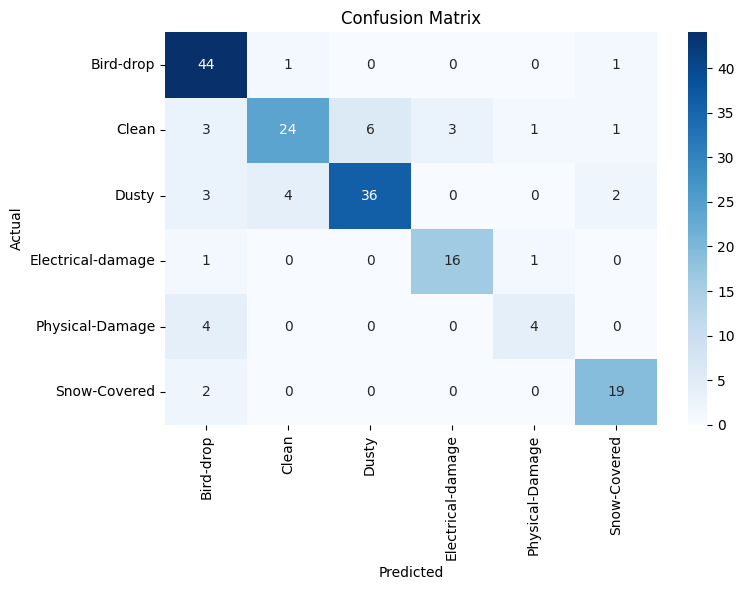

In [23]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reuse previous variables if still in session
# dataset, val_dataset, val_loader, model_save_path, num_classes

# 🧠 Load model
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_save_path))
model.eval().to(device)

# 📈 Evaluate
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Metrics
print("🎯 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))

# 📊 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [24]:
from PIL import Image
from torchvision import transforms
import torch

# 🔁 Reuse same transforms used in training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 🧠 Load trained model
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_save_path))
model = model.eval().to(device)

# 🔮 Predict function
def predict_image(img_path):
    image = Image.open(img_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)

    class_name = dataset.classes[predicted.item()]
    print(f"✅ Prediction: {class_name}")
    return class_name


In [25]:
predict_image(r"C:\Users\padmavathi\solar_demo\classification_data\Dusty\Dust (1).jpg")


✅ Prediction: Dusty


'Dusty'

In [26]:
for name, param in model.named_parameters():
    print(f"{name} → shape: {param.shape}")


conv1.weight → shape: torch.Size([64, 3, 7, 7])
bn1.weight → shape: torch.Size([64])
bn1.bias → shape: torch.Size([64])
layer1.0.conv1.weight → shape: torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight → shape: torch.Size([64])
layer1.0.bn1.bias → shape: torch.Size([64])
layer1.0.conv2.weight → shape: torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight → shape: torch.Size([64])
layer1.0.bn2.bias → shape: torch.Size([64])
layer1.1.conv1.weight → shape: torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight → shape: torch.Size([64])
layer1.1.bn1.bias → shape: torch.Size([64])
layer1.1.conv2.weight → shape: torch.Size([64, 64, 3, 3])
layer1.1.bn2.weight → shape: torch.Size([64])
layer1.1.bn2.bias → shape: torch.Size([64])
layer2.0.conv1.weight → shape: torch.Size([128, 64, 3, 3])
layer2.0.bn1.weight → shape: torch.Size([128])
layer2.0.bn1.bias → shape: torch.Size([128])
layer2.0.conv2.weight → shape: torch.Size([128, 128, 3, 3])
layer2.0.bn2.weight → shape: torch.Size([128])
layer2.0.bn2.bias → shape: tor

In [27]:
from torchvision.models import resnet18

model = resnet18()
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.ReLU):
        print(f"{name}: {module}")


relu: ReLU(inplace=True)
layer1.0.relu: ReLU(inplace=True)
layer1.1.relu: ReLU(inplace=True)
layer2.0.relu: ReLU(inplace=True)
layer2.1.relu: ReLU(inplace=True)
layer3.0.relu: ReLU(inplace=True)
layer3.1.relu: ReLU(inplace=True)
layer4.0.relu: ReLU(inplace=True)
layer4.1.relu: ReLU(inplace=True)


In [1]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = ImageFolder(root="classification_data", transform=transform)


In [2]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [3]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [11]:
class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [12]:
from torchvision.models import resnet18, ResNet18_Weights
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load("solar_cnn_model.pth", map_location=device))
model = model.to(device)


📈 Classification Report:
                   precision    recall  f1-score   support

        Bird-drop       0.96      0.47      0.63        47
            Clean       0.42      1.00      0.59        35
            Dusty       1.00      0.03      0.06        34
Electrical-damage       0.89      1.00      0.94        17
  Physical-Damage       0.67      0.46      0.55        13
     Snow-Covered       0.63      0.87      0.73        30

         accuracy                           0.61       176
        macro avg       0.76      0.64      0.58       176
     weighted avg       0.78      0.61      0.55       176



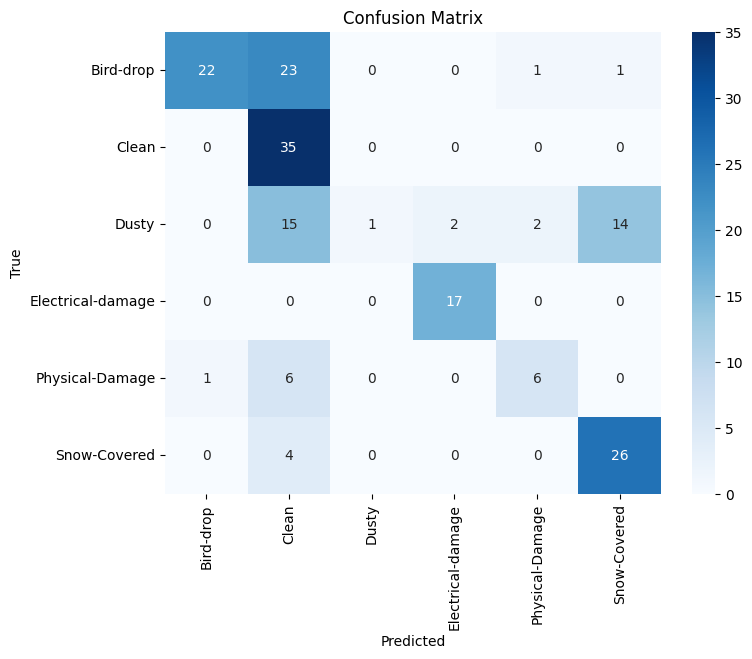

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# 🧠 Classification Report
print("📈 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 📊 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# --------------------------------------------
# 1. Setup
# --------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = "classification_data"
class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
num_classes = len(class_names)

# --------------------------------------------
# 2. Transforms (with augmentation)
# --------------------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --------------------------------------------
# 3. Load Dataset
# --------------------------------------------
dataset = datasets.ImageFolder(data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# --------------------------------------------
# 4. Class Weights to Handle Imbalance
# --------------------------------------------
targets = [label for _, label in dataset.imgs]
weights = compute_class_weight(class_weight='balanced', classes=np.unique(targets), y=targets)
weights = torch.tensor(weights, dtype=torch.float).to(device)

# --------------------------------------------
# 5. Model Setup
# --------------------------------------------
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# --------------------------------------------
# 6. Training Loop
# --------------------------------------------
epochs = 100

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"✅ Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# --------------------------------------------
# 7. Save the Trained Model
# --------------------------------------------
torch.save(model.state_dict(), "solar_cnn_model.pth")
print("✅ Model saved as 'solar_cnn_model.pth'")


✅ Epoch 1/100, Loss: 0.9920, Accuracy: 66.48%
✅ Epoch 2/100, Loss: 0.6142, Accuracy: 78.41%
✅ Epoch 3/100, Loss: 0.4587, Accuracy: 83.66%
✅ Epoch 4/100, Loss: 0.2623, Accuracy: 90.91%
✅ Epoch 5/100, Loss: 0.2829, Accuracy: 89.06%
✅ Epoch 6/100, Loss: 0.2641, Accuracy: 91.62%
✅ Epoch 7/100, Loss: 0.3438, Accuracy: 87.07%
✅ Epoch 8/100, Loss: 0.2130, Accuracy: 93.18%
✅ Epoch 9/100, Loss: 0.1915, Accuracy: 93.18%
✅ Epoch 10/100, Loss: 0.1681, Accuracy: 94.46%
✅ Epoch 11/100, Loss: 0.1716, Accuracy: 93.89%
✅ Epoch 12/100, Loss: 0.1708, Accuracy: 94.46%
✅ Epoch 13/100, Loss: 0.1328, Accuracy: 95.60%
✅ Epoch 14/100, Loss: 0.1266, Accuracy: 93.89%
✅ Epoch 15/100, Loss: 0.1030, Accuracy: 96.88%
✅ Epoch 16/100, Loss: 0.0688, Accuracy: 97.02%
✅ Epoch 17/100, Loss: 0.0777, Accuracy: 96.59%
✅ Epoch 18/100, Loss: 0.1111, Accuracy: 95.74%
✅ Epoch 19/100, Loss: 0.0983, Accuracy: 96.02%
✅ Epoch 20/100, Loss: 0.0793, Accuracy: 97.30%
✅ Epoch 21/100, Loss: 0.0717, Accuracy: 97.59%
✅ Epoch 22/100, Loss: 

📈 Classification Report:
                   precision    recall  f1-score   support

        Bird-drop       0.85      0.85      0.85        39
            Clean       0.84      0.92      0.88        39
            Dusty       0.86      0.78      0.82        41
Electrical-damage       0.88      0.94      0.91        16
  Physical-Damage       0.92      0.65      0.76        17
     Snow-Covered       0.86      1.00      0.92        24

         accuracy                           0.86       176
        macro avg       0.87      0.86      0.86       176
     weighted avg       0.86      0.86      0.86       176



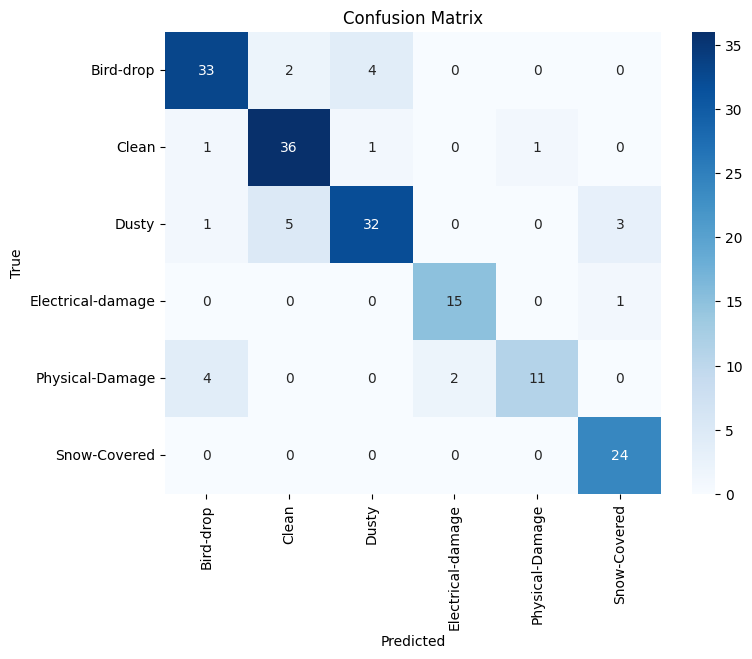

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print("📈 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [20]:
import pandas as pd

# Your class names should match what you used in training
class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

# Convert numeric labels to class names
mapped_y_true = [class_names[i] for i in y_true]
mapped_y_pred = [class_names[i] for i in y_pred]

# Save to CSVs for Streamlit
pd.DataFrame({"label": mapped_y_true}).to_csv("y_true.csv", index=False)
pd.DataFrame({"label": mapped_y_pred}).to_csv("y_pred.csv", index=False)

print("✅ CSVs saved: y_true.csv and y_pred.csv")


✅ CSVs saved: y_true.csv and y_pred.csv


In [18]:
import pandas as pd

# Save predictions for Streamlit use
pd.DataFrame({"label": y_true}).to_csv("y_true.csv", index=False)
pd.DataFrame({"label": y_pred}).to_csv("y_pred.csv", index=False)

print("✅ Saved y_true.csv and y_pred.csv for Streamlit.")


✅ Saved y_true.csv and y_pred.csv for Streamlit.
